In [148]:
import pandas as pd

import unicodedata

### Limpieza para el dataset mvp


In [149]:
# Cargar el archivo CSV de MVPs y hacemos limpiar los datos
mvp = pd.read_csv('../web_scraping/mvps.csv', encoding='utf-8', encoding_errors='replace')
mvp

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6,476,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,5,Karl Malone,27,UTA,0,142,960,0.148,82,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,4,5,Jalen Brunson,27,NYK,0,142,990,0.143,77,...,3.6,6.7,0.9,0.2,0.479,0.401,0.847,11.2,0.198,2024
504,5,6,Jayson Tatum,25,BOS,0,86,990,0.087,74,...,8.1,4.9,1.0,0.6,0.471,0.376,0.833,10.4,0.189,2024
505,6,7,Anthony Edwards,22,MIN,0,18,990,0.018,79,...,5.4,5.1,1.3,0.5,0.461,0.357,0.836,7.5,0.130,2024
506,7,8,Domantas Sabonis,27,SAC,0,3,990,0.003,82,...,13.7,8.2,0.9,0.6,0.594,0.379,0.704,12.6,0.206,2024


In [150]:
# Seleccionar solo las columnas relevantes
mvp_cleaned = mvp[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [151]:
mvp_cleaned

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891,960,0.928
1,Magic Johnson,1991,497,960,0.518
2,David Robinson,1991,476,960,0.496
3,Charles Barkley,1991,222,960,0.231
4,Karl Malone,1991,142,960,0.148
...,...,...,...,...,...
503,Jalen Brunson,2024,142,990,0.143
504,Jayson Tatum,2024,86,990,0.087
505,Anthony Edwards,2024,18,990,0.018
506,Domantas Sabonis,2024,3,990,0.003


### Limpieza para el dataset player

In [152]:
player = pd.read_csv('../web_scraping/players.csv', encoding='utf-8', encoding_errors='replace')
player

,Unnamed: 0,Rk,Player,Age,Team,Pos,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Michael Jordan,27,CHI,SG,82,82,37.0,12.1,...,1.4,4.6,6.0,5.5,2.7,1.0,2.5,2.8,31.5,1991
1,1,2,Karl Malone,27,UTA,PF,82,82,40.3,10.3,...,2.9,8.9,11.8,3.3,1.1,1.0,3.0,3.3,29.0,1991
2,2,3,Bernard King,34,WSB,SF,64,64,37.5,11.1,...,1.8,3.2,5.0,4.6,0.9,0.3,4.0,2.9,28.4,1991
3,3,4,Charles Barkley,27,PHI,SF,67,67,37.3,9.9,...,3.9,6.3,10.1,4.2,1.6,0.5,3.1,2.6,27.6,1991
4,4,5,Patrick Ewing,28,NYK,C,81,81,38.3,10.4,...,2.4,8.8,11.2,3.0,1.0,3.2,3.6,3.5,26.6,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20238,754,569,Ron Harper Jr.,23,TOR,PF,1,0,4.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2024
20239,755,570,Justin Jackson,28,MIN,SF,2,0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
20240,756,571,Dmytro Skapintsev,25,NYK,C,2,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
20241,757,572,Javonte Smart,24,PHI,PG,1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024


In [153]:
# Limpiamos los datos
del player['Unnamed: 0']
del player['Rk']

In [154]:
# Eliminamos los asteriscos de algunos nombres de jugadores
player["Player"] = player["Player"].str.replace("*", "", regex=False)

In [155]:
# Para los jugadores que se han cambiado de equipo durante la temporada, los fusionamos en uno solo
def fuse_player (df):
    # Si el dataframe tiene solo una fila, lo devolvemos tal cual
    if df.shape[0] == 1:
        return df
    
    else:
        # Selecciona y se queda únicamente con la fila que resume los totales de la temporada. Las filas de los equipos individuales (por ejemplo, LAL, PHX) se descartan.
        row = df[df["Team"].str.endswith("TM")]
        # Busca el nombre del último equipo en el que jugó el jugador esa temporada (la última fila del expediente original) y lo usa para reemplazar la palabra "xTm"
        row["Team"] = df.iloc[-1, :]["Team"]
        return row

players_cleaned = player.groupby(["Player", "Year"]).apply(fuse_player).reset_index(drop=True)

/tmp/ipykernel_6097/230314193.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players_cleaned = player.groupby(["Player", "Year"]).apply(fuse_player).reset_index(drop=True)


In [156]:
# Eliminamos las filas correspondientes a "League Average"
players_cleaned = players_cleaned[players_cleaned["Player"] != "League Average"]

In [157]:
# Ahora solo en 1991 una columna con el ultimo equipo que jugo 
players_cleaned[players_cleaned["Player"] == "Greg Anderson"] 

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
5748,Greg Anderson,26,DEN,PF,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
5749,Greg Anderson,27,DEN,PF,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
5750,Greg Anderson,29,DET,PF,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
5751,Greg Anderson,30,ATL,PF,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
5752,Greg Anderson,31,SAS,PF,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
5753,Greg Anderson,32,SAS,C,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
5754,Greg Anderson,33,ATL,C,50,0,8.0,0.7,1.6,.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


In [158]:
players_cleaned

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,A.C. Green,27,LAL,PF,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
1,A.C. Green,28,LAL,PF,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
2,A.C. Green,29,LAL,PF,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
3,A.C. Green,30,PHO,PF,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
4,A.C. Green,31,PHO,SF,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15837,Željko Rebrača,29,DET,C,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
15838,Željko Rebrača,30,DET,C,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
15839,Željko Rebrača,31,ATL,C,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
15840,Željko Rebrača,32,LAC,C,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [159]:
#Normaliza nombres eliminando caracteres especiales y acentos

def normalize_name(name):
    name_str = str(name)
    
    # Limpiar caracteres corruptos comunes
    replacements = {
        'Ä': 'c',  # Para casos como StojakoviÄ -> Stojakovic
        'Ã³': 'o',  # Para casos como GinÃ³bili -> Ginobili
        'Ã': 'i',   # Para casos como DragÄ -> Dragic
        '¡': 'c',
        'Ä': 'c'
    }
    
    for old, new in replacements.items():
        name_str = name_str.replace(old, new)
    
    # Normaliza el nombre para descomponer los caracteres acentuados
    nfkd_form = unicodedata.normalize('NFKD', name_str)
    # Devuelve solo los caracteres ASCII
    only_ascii = "".join([c for c in nfkd_form if not unicodedata.combining(c)])
    
    # Limpieza adicional: eliminar cualquier carácter no ASCII restante
    final_name = "".join([c if ord(c) < 128 else '' for c in only_ascii])
    
    return final_name

### Fusion de dataset player y mvp

In [160]:
# Normalizamos los nombres de los jugadores en ambos dataframes
players_cleaned["Player"] = players_cleaned["Player"].apply(normalize_name)
mvp_cleaned["Player"] = mvp_cleaned["Player"].apply(normalize_name)

# outer conserva toda la información de ambas tablas, sin descartar nada ponindo nan cuando no hay nada, y une las filas mediante player Y year
combine_stats = players_cleaned.merge(mvp_cleaned, how="outer", on=["Player","Year"])

/tmp/ipykernel_6097/1853553465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_cleaned["Player"] = mvp_cleaned["Player"].apply(normalize_name)


In [161]:
combine_stats.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,27,LAL,PF,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
1,A.C. Green,28,LAL,PF,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
2,A.C. Green,29,LAL,PF,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
3,A.C. Green,30,PHO,PF,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
4,A.C. Green,31,PHO,SF,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN


In [162]:
# Limpiamos los valores NaN sustituyendolos por 0
combine_stats[["Pts Won", "Pts Max", "Share"]] = combine_stats[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [163]:
combine_stats

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,27,LAL,PF,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,A.C. Green,28,LAL,PF,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,A.C. Green,29,LAL,PF,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,A.C. Green,30,PHO,PF,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,A.C. Green,31,PHO,SF,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15803,Zydrunas Ilgauskas,33,CLE,C,65,65,27.2,5.3,11.1,.472,...,1.0,0.4,1.3,1.4,2.8,12.9,2009,0.0,0.0,0.0
15804,Zydrunas Ilgauskas,34,CLE,C,64,6,20.9,3.0,6.8,.443,...,0.8,0.2,0.8,1.0,2.9,7.4,2010,0.0,0.0,0.0
15805,Zydrunas Ilgauskas,35,MIA,C,72,51,15.9,2.3,4.4,.508,...,0.4,0.3,0.8,0.7,2.6,5.0,2011,0.0,0.0,0.0
15806,Zylan Cheatham,24,NOP,PF,4,0,12.8,1.5,2.3,.667,...,0.8,0.3,0.3,1.0,2.5,3.0,2020,0.0,0.0,0.0


### Obtenemos la información del equipo

In [164]:
teams = pd.read_csv('../web_scraping/teams.csv', encoding='utf-8', encoding_errors='replace')
del teams['Unnamed: 0']


In [165]:
teams.head(50)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


In [166]:
# Limpiamos la columna de texto que no se ha limpiado correctamente al hacer web scraping
# Selecciona la columna "W" y elimina las filas que contienen la palabra "Division"
teams = teams[~teams["W"].str.contains("Division")]

In [167]:
# Delete the asterisk from some team names
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [168]:
teams.head(50)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls
8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons
9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks
10,43,39,.524,18.0,109.8,109.0,0.72,1991,Atlanta Hawks


#### Observamos que los nombres de los equipos en teams no estan abreviados al contrario que en combine_stats

In [169]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [170]:
combine_stats["Team"].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'MIL', 'CHI', 'GSW',
       'IND', 'WAS', 'MIN', 'BOS', 'ATL', 'HOU', 'DEN', 'ORL', 'NOH',
       'TOR', 'SAC', 'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'VAN',
       'SEA', 'NJN', 'NOK', 'LAC', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

In [171]:
nicknames_teams = {}

with open("nicknames.txt", encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines[1:]:
        # Delete \n
        abbr, name = line.replace("\n","").split(",")
        nicknames_teams[abbr] = name 
nicknames_teams

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [172]:
combine_stats["Team"] = combine_stats["Team"].map(nicknames_teams)
combine_stats

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,27,Los Angeles Lakers,PF,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,A.C. Green,28,Los Angeles Lakers,PF,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,A.C. Green,29,Los Angeles Lakers,PF,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,A.C. Green,30,Phoenix Suns,PF,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,A.C. Green,31,Phoenix Suns,SF,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15803,Zydrunas Ilgauskas,33,Cleveland Cavaliers,C,65,65,27.2,5.3,11.1,.472,...,1.0,0.4,1.3,1.4,2.8,12.9,2009,0.0,0.0,0.0
15804,Zydrunas Ilgauskas,34,Cleveland Cavaliers,C,64,6,20.9,3.0,6.8,.443,...,0.8,0.2,0.8,1.0,2.9,7.4,2010,0.0,0.0,0.0
15805,Zydrunas Ilgauskas,35,Miami Heat,C,72,51,15.9,2.3,4.4,.508,...,0.4,0.3,0.8,0.7,2.6,5.0,2011,0.0,0.0,0.0
15806,Zylan Cheatham,24,New Orleans Pelicans,PF,4,0,12.8,1.5,2.3,.667,...,0.8,0.3,0.3,1.0,2.5,3.0,2020,0.0,0.0,0.0


In [173]:
teams

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
1133,50,32,.610,—,117.9,115.6,2.30,2024,Dallas Mavericks
1134,49,33,.598,1.0,115.1,110.7,4.46,2024,New Orleans Pelicans
1135,41,41,.500,9.0,114.3,113.2,1.24,2024,Houston Rockets
1136,27,55,.329,23.0,105.8,112.8,-6.57,2024,Memphis Grizzlies


In [174]:
# Combined all stats with team stats
combined_stats_master = combine_stats.merge(teams, how="outer", on=["Team","Year"])

In [175]:
combined_stats_master

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Doc Rivers,29,Atlanta Hawks,PG,79,79,32.7,5.6,12.9,.435,...,0.0,0.0,0.00,43,39,.524,18.0,109.8,109.0,0.72
1,Dominique Wilkins,31,Atlanta Hawks,SF,81,81,38.0,9.5,20.2,.470,...,29.0,960.0,0.03,43,39,.524,18.0,109.8,109.0,0.72
2,Duane Ferrell,25,Atlanta Hawks,SF,78,2,14.9,2.2,4.6,.489,...,0.0,0.0,0.00,43,39,.524,18.0,109.8,109.0,0.72
3,Gary Leonard,23,Atlanta Hawks,C,4,0,2.3,0.0,0.0,NaN,...,0.0,0.0,0.00,43,39,.524,18.0,109.8,109.0,0.72
4,John Battle,28,Atlanta Hawks,SG,79,2,23.6,5.0,10.9,.461,...,0.0,0.0,0.00,43,39,.524,18.0,109.8,109.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15803,Marvin Bagley III,24,Washington Wizards,C,50,25,21.1,4.8,8.2,.586,...,0.0,0.0,0.00,15,67,.183,32.0,113.7,123.0,-9.29
15804,Patrick Baldwin Jr.,21,Washington Wizards,SF,38,7,13.0,1.6,4.1,.381,...,0.0,0.0,0.00,15,67,.183,32.0,113.7,123.0,-9.29
15805,Richaun Holmes,30,Washington Wizards,C,40,10,13.9,2.1,3.7,.558,...,0.0,0.0,0.00,15,67,.183,32.0,113.7,123.0,-9.29
15806,Tristan Vukcevic,20,Washington Wizards,C,10,4,15.3,2.9,6.7,.433,...,0.0,0.0,0.00,15,67,.183,32.0,113.7,123.0,-9.29


In [176]:
combined_stats_master.dtypes

Player      object
Age         object
Team        object
Pos         object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [177]:
# Las cadenas de texto se convierten a sus categorías correspondientes
combined_stats_master = combined_stats_master.apply(pd.to_numeric, errors="ignore")

/tmp/ipykernel_6097/680025344.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  combined_stats_master = combined_stats_master.apply(pd.to_numeric, errors="ignore")


In [178]:
combined_stats_master.dtypes

Player      object
Age          int64
Team        object
Pos         object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [179]:
# Esta columna no se ha convertido correctamente a int por el - por lo que lo reeplazamos por 0 
combined_stats_master["GB"].unique()

array(['18.0', '29.0', '14.0', '—', '10.0', '26.0', '13.0', '12.0', '2.0',
       '28.0', '27.0', '17.0', '15.0', '33.0', '46.0', '6.0', '22.0',
       '16.0', '20.0', '21.0', '3.0', '11.0', '25.0', '19.0', '5.0',
       '23.0', '12.5', '9.0', '8.0', '4.0', '35.0', '31.0', '1.0', '7.0',
       '32.0', '41.0', '24.0', '39.0', '45.0', '36.0', '37.0', '38.0',
       '4.5', '30.0', '43.0', '25.5', '44.0', '40.0', '42.0', '2.5',
       '51.0', '34.0', '20.5', '32.5', '48.0', '52.0', '3.5', '56.0',
       '10.5', '47.0', '11.5', '22.5', '1.5', '50.0', '21.5', '18.5'],
      dtype=object)

In [180]:
combined_stats_master["GB"] = combined_stats_master["GB"].replace("—", "0")
combined_stats_master["GB"].unique()

array(['18.0', '29.0', '14.0', '0', '10.0', '26.0', '13.0', '12.0', '2.0',
       '28.0', '27.0', '17.0', '15.0', '33.0', '46.0', '6.0', '22.0',
       '16.0', '20.0', '21.0', '3.0', '11.0', '25.0', '19.0', '5.0',
       '23.0', '12.5', '9.0', '8.0', '4.0', '35.0', '31.0', '1.0', '7.0',
       '32.0', '41.0', '24.0', '39.0', '45.0', '36.0', '37.0', '38.0',
       '4.5', '30.0', '43.0', '25.5', '44.0', '40.0', '42.0', '2.5',
       '51.0', '34.0', '20.5', '32.5', '48.0', '52.0', '3.5', '56.0',
       '10.5', '47.0', '11.5', '22.5', '1.5', '50.0', '21.5', '18.5'],
      dtype=object)

In [181]:
combined_stats_master["GB"] = pd.to_numeric(combined_stats_master["GB"])
combined_stats_master.dtypes

Player      object
Age          int64
Team        object
Pos         object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [182]:
# Observamos cuantos datos nulos hay en cada columna
pd.isnull(combined_stats_master).sum()

Player        0
Age           0
Team          0
Pos           0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          65
3P            0
3PA           0
3P%        2134
2P            0
2PA           0
2P%         110
eFG%         65
FT            0
FTA           0
FT%         580
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [183]:
# Observamos que si no ha tirado tiros triples al hacer el porcentaje da NaN
combined_stats_master[pd.isnull(combined_stats_master["3P%"])][["Player","3P","3P%"]]

,Player,3P,3P%
3,Gary Leonard,0.0,NaN
17,Gary Leonard,0.0,NaN
18,Jeff Sanders,0.0,NaN
34,Jeff Sanders,0.0,NaN
39,Randy Breuer,0.0,NaN
...,...,...,...
15756,Jaime Echenique,0.0,NaN
15768,Vernon Carey Jr.,0.0,NaN
15772,Daniel Gafford,0.0,NaN
15788,Vernon Carey Jr.,0.0,NaN


In [184]:
# Ahora vamos a reemplazar esto valores NaN por 0 
combined_stats_master = combined_stats_master.fillna(0)
combined_stats_master

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Doc Rivers,29,Atlanta Hawks,PG,79,79,32.7,5.6,12.9,0.435,...,0.0,0.0,0.00,43,39,0.524,18.0,109.8,109.0,0.72
1,Dominique Wilkins,31,Atlanta Hawks,SF,81,81,38.0,9.5,20.2,0.470,...,29.0,960.0,0.03,43,39,0.524,18.0,109.8,109.0,0.72
2,Duane Ferrell,25,Atlanta Hawks,SF,78,2,14.9,2.2,4.6,0.489,...,0.0,0.0,0.00,43,39,0.524,18.0,109.8,109.0,0.72
3,Gary Leonard,23,Atlanta Hawks,C,4,0,2.3,0.0,0.0,0.000,...,0.0,0.0,0.00,43,39,0.524,18.0,109.8,109.0,0.72
4,John Battle,28,Atlanta Hawks,SG,79,2,23.6,5.0,10.9,0.461,...,0.0,0.0,0.00,43,39,0.524,18.0,109.8,109.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15803,Marvin Bagley III,24,Washington Wizards,C,50,25,21.1,4.8,8.2,0.586,...,0.0,0.0,0.00,15,67,0.183,32.0,113.7,123.0,-9.29
15804,Patrick Baldwin Jr.,21,Washington Wizards,SF,38,7,13.0,1.6,4.1,0.381,...,0.0,0.0,0.00,15,67,0.183,32.0,113.7,123.0,-9.29
15805,Richaun Holmes,30,Washington Wizards,C,40,10,13.9,2.1,3.7,0.558,...,0.0,0.0,0.00,15,67,0.183,32.0,113.7,123.0,-9.29
15806,Tristan Vukcevic,20,Washington Wizards,C,10,4,15.3,2.9,6.7,0.433,...,0.0,0.0,0.00,15,67,0.183,32.0,113.7,123.0,-9.29


In [185]:
# Lo guardamos en un archivo CSV
combined_stats_master.to_csv("combined_stats_master.csv")

### Visualizamos los datos

<Axes: title={'center': 'Top 10 jugadores con más puntos en la temporada (mínimo 70 partidos jugados)'}, xlabel='Player'>

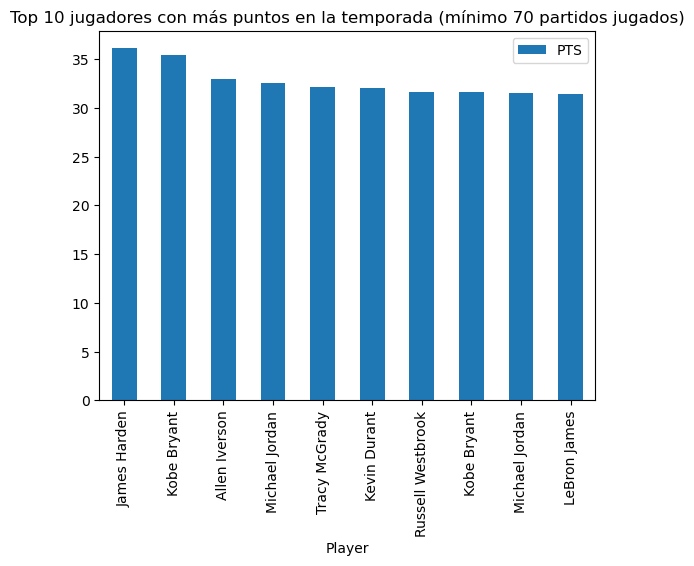

In [186]:
# Ordena los jugadores que hayan jugado más de 70 partidos y los ordena por los 10 que mas puntos han anotado
hightest_score = combined_stats_master[combined_stats_master["G"] > 70].sort_values(by="PTS", ascending=False).head(10)
hightest_score.plot.bar(x="Player", y="PTS", title="Top 10 jugadores con más puntos en la temporada (mínimo 70 partidos jugados)")

/tmp/ipykernel_6097/2903415991.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hightest_score_per_year = combined_stats_master.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))


<Axes: title={'center': 'Jugador con más puntos por año'}, xlabel='Year'>

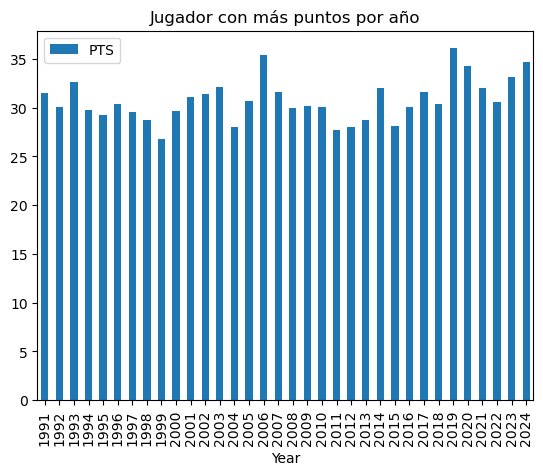

In [187]:
hightest_score_per_year = combined_stats_master.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
hightest_score_per_year.plot.bar(x="Year", y="PTS", title="Jugador con más puntos por año")

<Axes: title={'center': 'Correlación de estadísticas con el Share de MVP'}>

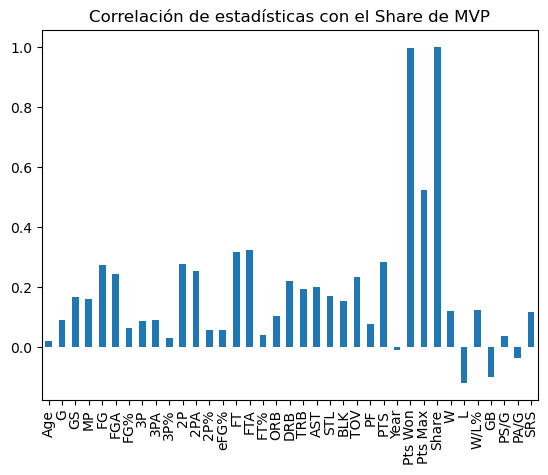

In [188]:
corr = combined_stats_master.corr(numeric_only=True)["Share"]
corr.plot.bar(title="Correlación de estadísticas con el Share de MVP")